<a href="https://colab.research.google.com/github/siman-giri/Machine_learning_LABS/blob/master/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#dataset = 'Task7_DataSet'
#file_name_train = '01_train.csv'
#file_name_test = '01_test.csv'

#file_name_train = os.path.join(dataset, file_name_train)
#file_name_test = os.path.join(dataset, file_name_test)

NameError: ignored

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 01_test.csv to 01_test.csv
User uploaded file "01_test.csv" with length 258860 bytes


In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 01_train.csv to 01_train.csv
User uploaded file "01_train.csv" with length 259098 bytes


In [0]:
file_name_train = '01_train.csv'
file_name_test = '01_test.csv'

In [0]:
class DataModel:
    def __init__(self, filename, normalize=True):
        self.filename = filename
        self.normalize = normalize
        self.data = pd.read_csv(self.filename)
        self.x, self.y = self.prepare_data()
        
    def normalize_data(self):
        self.x = self.x.apply(lambda x : x - np.mean(x) / np.std(x), axis=1)
    
    def prepare_data(self):
        self.x = self.data.iloc[:,:-1]
        self.y = self.data.iloc[: ,-1]
        if self.normalize:
            self.normalize_data()
        return self.x.values, self.y.values
        
    
        
    
    

In [0]:
train = DataModel(file_name_train, False)
test = DataModel(file_name_test, False)

In [0]:
class DT:
    def __init__(self, X, Y, max_depth=10):
        self.X = X
        self.Y = Y
        self.max_depth = max_depth
        self.n = len(X)
        self.features = len(X[0])
        self.classes = np.unique(Y)
        self.tree = []


    def information_gain_gini(self, groups, y_groups):
        total_values = sum(len(g) for g in groups)
        score = 0.0
        for i in range(len(groups)):
            group = groups[i]
            y_group = y_groups[i]
            group_size = float(len(group))
            if group_size == 0.0:
                continue
            gini_score_group = 0.0
            for i in self.classes:
                propotion = (y_group == i).sum() / group_size
                gini_score_group += propotion * propotion

            score += ( 1.0 - gini_score_group ) * ( group_size/total_values)
        return score


    def do_split_and_test(self, column_index, value, dataset, y_data):
        left = []
        right = []
        y_left = []
        y_right = []

        for i in range(len(dataset)):
            if dataset[i][column_index] < value:
                left.append(dataset[i])
                y_left.append(y_data[i])
            else:
                right.append(dataset[i])
                y_right.append(y_data[i])

        return ( np.array(left), np.array(right) ) , ( np.array(y_left), np.array(y_right) )


    def generate_best_split(self, dataset, y_data):
        best_gini_score, best_index, best_value, best_groups = float("inf"), 999, 999, []
        for index in range(self.features):
            i = 0
            for row in dataset:
                i+=1
                groups, y_groups = self.do_split_and_test(index, row[index], dataset, y_data)
                gini_score = self.information_gain_gini(groups, y_groups)
                if gini_score < best_gini_score:
                    best_gini_score, best_index, best_value, best_groups, best_y_groups  = gini_score, index, row[index], groups, y_groups

        return {'index':best_index, 'value':best_value, 'groups':best_groups, 'y_groups' : best_y_groups}


    def gen_terminal(self, group):
        group = group.tolist()
        return max(np.unique(group), key=group.count)


    def split(self, node, depth):
        left, right = node['groups']
        y_left, y_right = node['y_groups']
        del node['groups']
        del node['y_groups']

        if not len(left) or not len(right):
            node['left'] = node['right'] = self.gen_terminal(np.append(y_left, y_right))
            return

        if depth >= self.max_depth:
            node['left'], node['right'] = self.gen_terminal(y_left), self.gen_terminal(y_right)
            return


        node['left'] = self.generate_best_split(left, y_left)
        self.split(node['left'], depth+1)

        node['right'] = self.generate_best_split(right, y_right)
        self.split(node['right'], depth+1)


    def generate_tree(self):
        root = self.generate_best_split(self.X, self.Y)
        self.split(root, 1)
        self.tree = root


    def accuracy(self):
        accuracy = 0
        for i in range(len(self.y_predicted)):
            if int(self.y_predicted[i]) == int(self.y_test[i]):
                accuracy += 1

        return float(accuracy * 100/len(self.y_predicted))


    def recursive_predict(self, node, row):
        if row[node['index']] < node['value']:
            if isinstance(node['left'], dict):
                return self.recursive_predict(node['left'], row)
            else:
                return node['left']
        else:
            if isinstance(node['right'], dict):
                return self.recursive_predict(node['right'], row)
            else:
                return node['right']


    def predict(self,test_x, test_y):
        self.y_predicted = []
        self.y_test = test_y
        self.x_test = test_x
        for row in test_x:
            self.y_predicted.append(self.recursive_predict(self.tree, row))


        return self.y_predicted






In [0]:
ac_v_h = []

In [0]:
for h in range(1,6):
    print('Depth: {}'.format(h), end='')
    decision_tree = DT(train.x, train.y,max_depth=h)
    decision_tree.generate_tree()
    predcited_y = decision_tree.predict(test.x, test.y)
    print('\t Accuracy : {}'.format(decision_tree.accuracy()))
    ac_v_h.append((h, decision_tree.accuracy()))

Depth: 1	 Accuracy : 63.762528912875865
Depth: 2	 Accuracy : 86.35312259059367
Depth: 3	 Accuracy : 99.48599331791313
Depth: 4	 Accuracy : 99.4088923156001
Depth: 5	 Accuracy : 99.2289899768697


In [0]:
def plotit(ac_v_h):
    plt.figure(figsize=(12,9))
    plt.plot([int(row[0]) for row in ac_v_h], [row[1] for row in ac_v_h])
    plt.xlabel('Height Of Tree')
    plt.ylabel('Accuracy')
    plt.show()


In [0]:
ac_v_h

[(1, 63.762528912875865),
 (2, 86.35312259059367),
 (3, 99.48599331791313),
 (4, 99.4088923156001),
 (5, 99.2289899768697)]

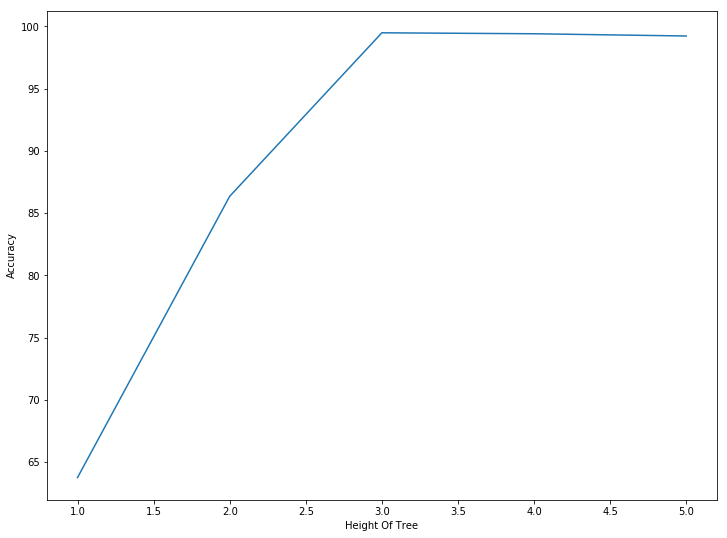

In [0]:
plotit(ac_v_h)

## The Accuracy of tree was optimum when the height of tree was 3